<a href="https://colab.research.google.com/github/Mingnarto/opencv/blob/main/08_Deep_Learning_for_Computer_Vision_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras Convolutional Neural Networks with MNIST

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import tensorflow as tf
from sklearn.metrics import classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

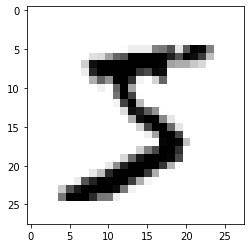

In [ ]:
plt.imshow(single_image, cmap='gray_r')
# cmap='gray_r' (dark text, white bg)

In [ ]:
y_train
# label (notice the first text is 5, then 4 etc)
# the model won't understand this is a category if we feed it this way
# it might think this is some kind of regression problem
# we need to use one-hot encoding to prevent that

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)
# to_categorical(labels, no. of classes)

In [ ]:
y_cat_train[0]
# text 5 above

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
single_image
# hasn't been normalized

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
single_image.max()
# max still 255
# should normalized this between 0-1

255

In [ ]:
x_train = x_train / x_train.max()  # or /255

In [ ]:
x_test = x_test / x_test.max()

In [ ]:
scaled_image = x_test[0]

In [ ]:
scaled_image
# notice everything is now between 0-1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
scaled_image.max()

1.0

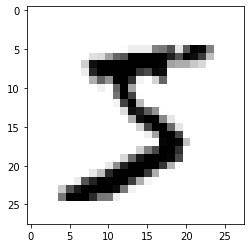

In [ ]:
plt.imshow(single_image, cmap='gray_r')

In [ ]:
x_train.shape
# no color channel
# let's add color channel so we can see how 4 dim looks like
# it also helps us to use this model for different image problem with color channel

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
# essentially just defining the fact that there is color channel there

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 input_shape=(28,28,1),
                 activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))
# pool_size=(2,2) is good default (you can try to play around or just follow the latest paper)

# FLATTEN
model.add(Flatten())
# flatten it to be 1 dim

# DENSE LAYER
model.add(Dense(128, activation='relu'))

# OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

# COMPILE
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2659 - accuracy: 0.9178
Epoch 2/2
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0498 - accuracy: 0.9854


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.0391 - accuracy: 0.9880


[0.03914239630103111, 0.9879999756813049]

In [ ]:
predictions = model.predict_classes(x_test)
# model predict images it hasn't seen before

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_cat_test
# correct answers

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_test, predictions))
# notice we use y_test and not y_cat_test
# reason being predictions is using original format and no longer one-hot format

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Keras Convolutional Neural Networks with CIFAR-10

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from sklearn.metrics import classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape
# it has color channel

(50000, 32, 32, 3)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

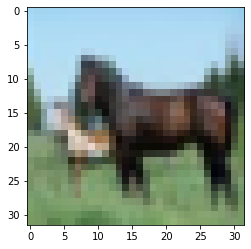

In [ ]:
plt.imshow(x_train[12])

In [ ]:
x_train.max()
# need to normalize

255

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train
# still in original label
# need to be one-hot encoded

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,
          kernel_size=(4,4),
          input_shape=(32,32,3),
          activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,
          kernel_size=(4,4),
          input_shape=(32,32,3),
          activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# 128, 256, 512
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9168 - accuracy: 0.6842
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8313 - accuracy: 0.7154
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7575 - accuracy: 0.7419
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6971 - accuracy: 0.7616
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.6502 - accuracy: 0.7774
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6064 - accuracy: 0.7946
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.5651 - accuracy: 0.8071
Epoch 8/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.5358 - accuracy: 0.8185
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5078 - accuracy: 0.8278
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.1969 - accuracy: 0.6878


[1.1969472169876099, 0.6877999901771545]

In [ ]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.82      0.80      0.81      1000
           2       0.67      0.48      0.56      1000
           3       0.57      0.40      0.47      1000
           4       0.61      0.66      0.63      1000
           5       0.56      0.62      0.59      1000
           6       0.72      0.81      0.76      1000
           7       0.71      0.77      0.74      1000
           8       0.73      0.81      0.76      1000
           9       0.72      0.81      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000



## Deep Learning on Custom Images - CATS / DOGS

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!ls "/content/gdrive/My Drive"

 10.jpg
 11.jpg
 1.jpg
 2.jpg
 3.jpg
 4.jpg
 5.jpg
 6.jpg
 7.jpg
 8.jpg
 9.jpg
 Animation_Background_Layout_From_Student_to_Pro.pdf
'Back cmyk.tif'
 Blunderbuss.ZTL
 boot.rar
 Byrne_M_T_-_The_Art_of_Layout_and_Storyboardin.pdf
'Card cmyk.tif'
 CATS_DOGS.zip
 Claustrophobia.docx
'Colab Notebooks'
 Don_Bluths_Art_Of_Storyboard.pdf
'Envelope cmyk.tif'
'FinalProjectPPT_Numpy (1).gslides'
 frog_col.psd
 Frog_Text_Zbrush.ZTL
 img-530162655-0001.jpg
 img-530162655-0002.jpg
 img-530162655-0003.jpg
 img-530162655-0004.jpg
 img-530162655-0005.jpg
 img-530162655-0006.jpg
 img-530162655-0007.jpg
 img-530162655-0008.jpg
 img-530162655-0009.jpg
 img-530162655-0010.jpg
 img-530162655-0011.jpg
 img-530162655-0012.jpg
 img-530162655-0013.jpg
 img-530162655-0014.jpg
 img-530162655-0015.jpg
 img-530162655-0016.jpg
 img-530162655-0017.jpg
 img-530162655-0018.jpg
 img-530162655-0019.jpg
 img-530162655-0020.jpg
 img-530162655-0021.jpg
 img-530162655-0022.jpg
 img-530162655-0023.jpg
 img-530162655-0024.jpg
 

In [ ]:
!unzip -q "/content/gdrive/My Drive/CATS_DOGS.zip"

In [ ]:
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

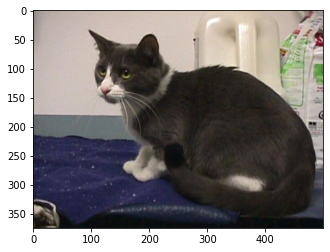

In [ ]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [ ]:
cat4.shape

(375, 500, 3)

In [ ]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')

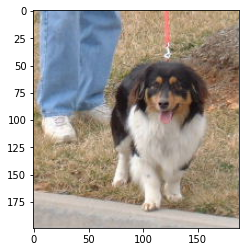

In [ ]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [ ]:
dog.shape

(199, 188, 3)

In [ ]:
dog.max()

255

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [ ]:
image_gen.random_transform(dog)

array([[[190, 161, 129],
        [190, 161, 129],
        [190, 161, 129],
        ...,
        [194, 170, 136],
        [189, 165, 131],
        [195, 173, 134]],

       [[190, 161, 129],
        [190, 161, 129],
        [190, 161, 129],
        ...,
        [180, 156, 122],
        [181, 157, 123],
        [187, 164, 126]],

       [[190, 161, 129],
        [190, 161, 129],
        [190, 161, 129],
        ...,
        [173, 149, 115],
        [174, 150, 116],
        [178, 156, 118]],

       ...,

       [[212, 202, 193],
        [213, 203, 194],
        [213, 203, 194],
        ...,
        [201, 197, 193],
        [201, 197, 192],
        [202, 197, 193]],

       [[214, 204, 195],
        [214, 204, 195],
        [214, 204, 195],
        ...,
        [203, 197, 191],
        [202, 195, 190],
        [202, 195, 190]],

       [[212, 202, 193],
        [212, 202, 193],
        [211, 201, 192],
        ...,
        [209, 201, 194],
        [211, 203, 196],
        [211, 204, 196]]

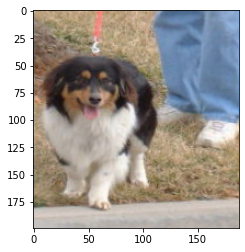

In [ ]:
plt.imshow(image_gen.random_transform(dog))

In [ ]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


## Deep Learning on Custom Images - Part Two

In [ ]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [ ]:
input_shape = (150,150,3)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=input_shape,
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 input_shape=input_shape,
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 input_shape=input_shape,
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
# Dropout == reduce overfitting by randomly turning neurons off during training
# 0.5 == 50% random neurons off

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

In [ ]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

In [ ]:
train_image_gen.class_indices

In [ ]:
results = model.fit_generator(train_image_gen,
                              epochs=1,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                              validation_steps=12)

In [ ]:
results.history['accuracy']

[0.5170833468437195]

In [ ]:
new_model = load_model('cat_dog_100epochs.h5')

In [ ]:
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'
# load dog image

In [ ]:
dog_img = image.load_img(dog_file,target_size=(150,150))
# resize the image that the neural networks expect

In [ ]:
dog_img = image.img_to_array(dog_img)
# turn it to array

In [ ]:
dog_img.shape
# right now the dimension is (150, 150, 3)
# we need to change this so that the neural networks think that it is a batch of 1 image
# it means (1, 150, 150, 3)
# we can use expand to do it

(150, 150, 3)

In [ ]:
dog_img = np.expand_dims(dog_img,axis=0)

In [ ]:
dog_img.shape

(1, 150, 150, 3)

In [ ]:
dog_img = dog_img/255

In [ ]:
model.predict_classes(dog_img)
# 1 == dog

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [ ]:
model.predict(dog_img)
# how sure the model

array([[0.5038111]], dtype=float32)